In [1]:
#In this cell all libraries used in the notebook are loaded
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import timeit

from ema_workbench import (Model, CategoricalParameter, SequentialEvaluator, MultiprocessingEvaluator, Policy, Scenario, perform_experiments,
                           ScalarOutcome, IntegerParameter, RealParameter, save_results, load_results)
from ema_workbench.em_framework.evaluators import perform_experiments
from ema_workbench.em_framework.samplers import sample_uncertainties
from ema_workbench.util import ema_logging
from problem_formulation import get_model_for_problem_formulation
import copy

ema_logging.log_to_stderr(ema_logging.INFO)

<Logger EMA (DEBUG)>

In [2]:
#Here the problem formulation created by group 22 is called as the dike model, and uncertainties and levers are connected to the Workbench
dike_model, planning_steps = get_model_for_problem_formulation(6)
uncertainties = dike_model.uncertainties
levers = dike_model.levers

In [3]:
#This creates a policy with the best policy from PG.3 and 2 days EWS
final_policy = Policy('final_policy', **{'0_RfR 0':1,
                                      '0_RfR 1':1,
                                      '0_RfR 2':1,
                                      '1_RfR 0':0,
                                      '1_RfR 1':0,
                                      '1_RfR 2':0,
                                      '2_RfR 0':1,
                                      '2_RfR 1':1,
                                      '2_RfR 2':1, 
                                      '3_RfR 0':1, 
                                      '3_RfR 1':1, 
                                      '3_RfR 2':1, 
                                      '4_RfR 0':0,
                                      '4_RfR 1':0, 
                                      '4_RfR 2':0, 
                                      'EWS_DaysToThreat':2,
                                      'A.1_DikeIncrease 0':4, 
                                      'A.1_DikeIncrease 1':4, 
                                      'A.1_DikeIncrease 2':4,
                                      'A.2_DikeIncrease 0':6,
                                      'A.2_DikeIncrease 1':6,
                                      'A.2_DikeIncrease 2':6,
                                      'A.3_DikeIncrease 0':6,
                                      'A.3_DikeIncrease 1':6,
                                      'A.3_DikeIncrease 2':6,
                                      'A.4_DikeIncrease 0':3,
                                      'A.4_DikeIncrease 1':3,
                                      'A.4_DikeIncrease 2':3,
                                      'A.5_DikeIncrease 0':5,
                                      'A.5_DikeIncrease 1':5,
                                      'A.5_DikeIncrease 2':5})

In [8]:
tic=timeit.default_timer()
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(scenarios=10000, policies=final_policy)
toc=timeit.default_timer()

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 10000 scenarios * 1 policies * 1 model(s) = 10000 experiments
[MainProcess/INFO] 1000 cases completed
[MainProcess/INFO] 2000 cases completed
[MainProcess/INFO] 3000 cases completed
[MainProcess/INFO] 4000 cases completed
[MainProcess/INFO] 5000 cases completed
[MainProcess/INFO] 6000 cases completed
[MainProcess/INFO] 7000 cases completed
[MainProcess/INFO] 8000 cases completed
[MainProcess/INFO] 9000 cases completed
[MainProcess/INFO] 10000 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [9]:
save_results(results, 'final_policy.tar.gz')
print('Multiprocessing time in seconds:', toc-tic)
experiments, outcomes = results
data = pd.DataFrame(outcomes)
deaths = pd.DataFrame(outcomes, columns = ['A.1_Expected Number of Deaths', 'A.2_Expected Number of Deaths', 'A.3_Expected Number of Deaths',
                                         'A.4_Expected Number of Deaths', 'A.5_Expected Number of Deaths'])

[MainProcess/INFO] results saved successfully to C:\Users\wsgru\Documents\Studie\Industrial Ecology\IE Year 1\Q4\Model-based Decision-making\epa1361_open-master2\epa1361_open-master\final assignment\final_policy.tar.gz


Multiprocessing time in seconds: 7712.6524169


C:\Programs\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


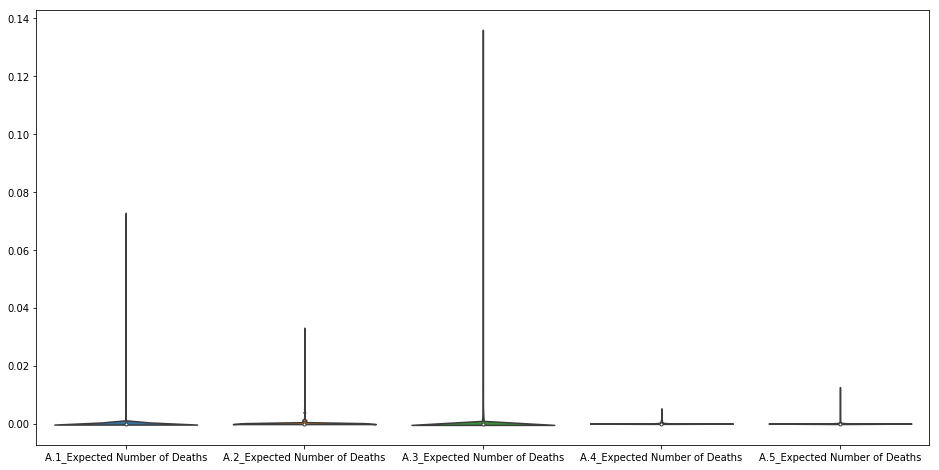

In [21]:
fig, ax = plt.subplots(figsize=(16,8))
sns.violinplot(data=deaths, scale='width');

In [115]:
for i in range(1,6):
    print('The maximum regret for location A.{} is:'.format(i), outcomes['A.{}_Expected Number of Deaths'.format(i)].max())

The maximum regret for location A.1 is: 0.07245742725491144
The maximum regret for location A.2 is: 0.03295987035146965
The maximum regret for location A.3 is: 0.13555291193754473
The maximum regret for location A.4 is: 0.005207458063090061
The maximum regret for location A.5 is: 0.012503479754275295


In [130]:
y = []
for i in range(10000):
    if outcomes['A.1_Expected Number of Deaths'][i]== 0.0 and outcomes['A.2_Expected Number of Deaths'][i]== 0.0 and outcomes['A.3_Expected Number of Deaths'][i]== 0.0 and outcomes['A.4_Expected Number of Deaths'][i]== 0.0 and outcomes['A.5_Expected Number of Deaths'][i]== 0.0:
        y.append(True)
    else:
        y.append(False)
y = np.array(y)
print('Fraction of scenarios with no deaths at all:', sum(y)/len(outcomes['A.1_Expected Number of Deaths']))

Fraction of scenarios with no deaths at all: 0.6563


C:\Programs\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


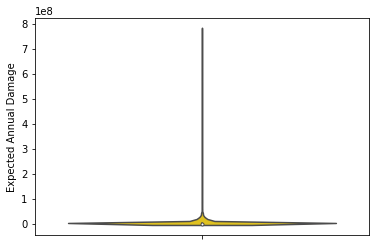

In [11]:
sns.violinplot(data=data, y='Expected Annual Damage', color='gold');

In [111]:
damage = outcomes['Expected Annual Damage'] > 1e8
print('Fraction of solutions with more than 1e8 damage:',  sum(damage)/10000)
print('Maximum regret damage:', outcomes['Expected Annual Damage'].max())

Fraction of solutions with more than 1e8 damage: 0.0007
Maximum regret damage: 779362564.12052


In [114]:
print('The total costs are:', outcomes['RfR Investment Costs'][0]+outcomes['Dike Investment Costs'][0]+outcomes['Evacuation Costs'].max())

The total costs are: 1396724895.3456867
